Calculate when models reach 2 or 3 degrees global warming level for ASCE 7

Data from Rachel McCrary. This looks at any CMIP6 models available on campaign

*Assumes 0.85C warming between pre-industrial and the 1995-2014 period*. So effective threshold is 1.15 or 2.15C

Notes from Rachel:

The output files have a few different things:
* tasavg = Annual Global Mean 2m temperature   
* tasavg20yr = 20 year running mean of tasavg; value is placed at the starting year so for 1850-1869, the 20 year average is at 1850)  
* year = Year for the tasavg var  
* styear = the starting point of the 20-year running mean  
* edyear = the ending point of the 20- year running mean


* tasavg20yr@GWL2deg = the year range for the 2deg of warming level  
* tasavg20yr@GWL3deg = the year range for the 3deg of warming level

Data directories:  
/glade/u/home/rmccrary/ncl/GWL/GlobalMeanTemp_CESM2LE.ncl  
/glade/campaign/ral/risc/NIST_icing/GWL/CMIP6_tseries


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import glob
import os
from os.path import expanduser, join

import numpy as np
import pandas as pd
import xarray as xr

In [3]:
indir = "/glade/campaign/ral/risc/NIST_icing/GWL/CMIP6_tseries/"
odir = "/glade/work/maritye/Icing/"
figdir = '/glade/u/home/maritye/Plots/Icing/'

In [4]:
mods = sorted(os.listdir('/glade/campaign/ral/risc/NIST_icing/GWL/CMIP6/'))

In [5]:
scens = ['ssp245','ssp370','ssp585']

In [6]:
files = sorted(glob.glob(join(indir, "*.nc")))

Start with a loop through all models to print model, member reference, scenario, GWL2 and GWL3 ranges

In [7]:
ref = []
mem = []
scen = []

for i in range(len(files)):
    val = files[i].split('.')
    ref.append(val[2])
    mem.append(val[3])
    scen.append(val[4])

In [11]:
da4 = []
da5 = []
for i in range(len(files)):
    da = xr.open_dataset(files[i])
    da4.append(da.tasavg20yr.attrs['GWL2deg'])
    da5.append(da.tasavg20yr.attrs['GWL3deg'])


In [12]:
gwl_ranges = {
    'Model' : ref,
    'Member' : mem,
    'Scenario' : scen,
    'GWL2' : da4,
    'GWL3' : da5
}

In [13]:
# Change to dataframe and save to csv
df = pd.DataFrame(gwl_ranges)
df.to_csv(join(odir,'CMIP6_GWL-ranges_update.csv'), index=False)


Edited table above in Excel to calculate ensemble mean by scenario and model.

### Plot

In [7]:
import matplotlib.pyplot as plt

In [8]:
from matplotlib.lines import Line2D

In [9]:
file245 = sorted(glob.glob(join(indir, '*.ssp245*.nc')))
file370 = sorted(glob.glob(join(indir, '*.ssp370*.nc')))
file585 = sorted(glob.glob(join(indir, '*.ssp585*.nc')))

In [10]:
ssp245 = xr.open_mfdataset(file245, combine="nested", concat_dim="member")

In [11]:
anoms245 = ssp245.tasavg20yr-(ssp245.tasavg20yr.sel(time=145)) +0.85 #relative to 1995-2014 baseline

In [12]:
anoms245['time'] = np.arange(1850, 2101)

In [13]:
ssp370 = xr.open_mfdataset(file370, combine='nested', concat_dim='member')
anoms370 = ssp370.tasavg20yr-(ssp370.tasavg20yr.sel(time=145)) +0.85

In [14]:
anoms370['time'] = np.arange(1850, 2101)

In [15]:
ssp585 = xr.open_mfdataset(file585, combine='nested', concat_dim='member')
anoms585 = ssp585.tasavg20yr-(ssp585.tasavg20yr.sel(time=145)) +0.85

In [16]:
anoms585['time'] = np.arange(1850, 2101)

Separate reading in for only the models associated with NA CORDEX, by model and scenario

In [17]:
can245 = sorted(glob.glob(join(indir, '*CanESM5.*ssp245*.nc')))
can370 = sorted(glob.glob(join(indir, '*CanESM5.*ssp370*.nc')))
can585 = sorted(glob.glob(join(indir, '*CanESM5.*ssp585*.nc')))
cnrm245 = sorted(glob.glob(join(indir, '*CNRM-ESM2-1.*ssp245*.nc')))
cnrm370 = sorted(glob.glob(join(indir, '*CNRM-ESM2-1.*ssp370*.nc')))
cnrm585 = sorted(glob.glob(join(indir, '*CNRM-ESM2-1.*ssp585*.nc')))
mpi370 = sorted(glob.glob(join(indir, '*MPI-ESM1-2-LR.*ssp370*.nc')))
mpi585 = sorted(glob.glob(join(indir, '*MPI-ESM1-2-LR.*ssp585*.nc')))
nor370  = glob.glob(join(indir, '*NorESM2-LM.*ssp370*.nc'))
nor585  = glob.glob(join(indir, '*NorESM2-LM.*ssp585*.nc'))

In [18]:
can_245 = xr.open_mfdataset(can245, combine='nested', concat_dim='member')
can_370 = xr.open_mfdataset(can370, combine='nested', concat_dim='member')
can_585 = xr.open_mfdataset(can585, combine='nested', concat_dim='member')
cnrm_245 = xr.open_mfdataset(cnrm245, combine='nested', concat_dim='member')
cnrm_370 = xr.open_mfdataset(cnrm370, combine='nested', concat_dim='member')
cnrm_585 = xr.open_mfdataset(cnrm585, combine='nested', concat_dim='member')
mpi_370 = xr.open_mfdataset(mpi370, combine='nested', concat_dim='member')
mpi_585 = xr.open_mfdataset(mpi585, combine='nested', concat_dim='member')
nor_370 = xr.open_dataset(nor370[0])
nor_585 = xr.open_dataset(nor585[0])

In [19]:
can_anoms245 = can_245.tasavg20yr-can_245.tasavg20yr.sel(time=145) + 0.85
can_anoms370 = can_370.tasavg20yr-can_370.tasavg20yr.sel(time=145) + 0.85
can_anoms585 = can_585.tasavg20yr-can_585.tasavg20yr.sel(time=145) + 0.85
cnrm_anoms245 = cnrm_245.tasavg20yr-cnrm_245.tasavg20yr.sel(time=145) + 0.85
cnrm_anoms370 = cnrm_370.tasavg20yr-cnrm_370.tasavg20yr.sel(time=145) + 0.85
cnrm_anoms585 = cnrm_585.tasavg20yr-cnrm_585.tasavg20yr.sel(time=145) + 0.85
mpi_anoms370 = mpi_370.tasavg20yr-mpi_370.tasavg20yr.sel(time=145) + 0.85
mpi_anoms585 = mpi_585.tasavg20yr-mpi_585.tasavg20yr.sel(time=145) + 0.85
nor_anoms370 = nor_370.tasavg20yr-nor_370.tasavg20yr.sel(time=145) + 0.85
nor_anoms585 = nor_585.tasavg20yr-nor_585.tasavg20yr.sel(time=145) + 0.85


In [20]:
# change the times to be years since 1850
can_anoms245['time'] = np.arange(1850, 2101)
can_anoms370['time'] = np.arange(1850, 2101)
can_anoms585['time'] = np.arange(1850, 2101)
cnrm_anoms245['time'] = np.arange(1850, 2101) 
cnrm_anoms370['time'] = np.arange(1850, 2101) 
cnrm_anoms585['time'] = np.arange(1850, 2101) 
mpi_anoms370['time'] = np.arange(1850, 2101)
mpi_anoms585['time'] = np.arange(1850, 2101)
nor_anoms370['time'] = np.arange(1850, 2101)
nor_anoms585['time'] = np.arange(1850, 2101)

Bring in CMIP5 models.
These are all relative to 1995, time variable is either 360 or 365 days. So create one file for each model and each scenario (e.g. CanESM2, RCP4.5)

In [21]:
can45 = sorted(glob.glob(join('/glade/u/home/maritye/PROGS/Icing/GWL/','tas_CanESM2_'+'*_rcp45*.nc')))
can85 = sorted(glob.glob(join('/glade/u/home/maritye/PROGS/Icing/GWL/','tas_CanESM2_'+'*_rcp85*.nc')))
gfdl45 = '/glade/u/home/maritye/PROGS/Icing/GWL/tas_GFDL-ESM2M_r1i1p1_rcp45-globalmeantemp_1995-2100.nc'
gfdl85 = '/glade/u/home/maritye/PROGS/Icing/GWL/tas_GFDL-ESM2M_r1i1p1_rcp85-globalmeantemp_1995-2100.nc'
had45 = sorted(glob.glob(join('/glade/u/home/maritye/PROGS/Icing/GWL/','tas_HadGEM2-ES_'+'*_rcp45*.nc')))
had85 = sorted(glob.glob(join('/glade/u/home/maritye/PROGS/Icing/GWL/','tas_HadGEM2-ES_'+'*_rcp85*.nc')))
mplr45 = sorted(glob.glob(join('/glade/u/home/maritye/PROGS/Icing/GWL/','tas_MPI-ESM-LR_'+'*_rcp45*.nc')))
mplr85 = sorted(glob.glob(join('/glade/u/home/maritye/PROGS/Icing/GWL/','tas_MPI-ESM-LR_'+'*_rcp85*.nc')))
mpmr45 = '/glade/u/home/maritye/PROGS/Icing/GWL/tas_MPI-ESM-MR_r1i1p1_rcp45-globalmeantemp_1995-2100.nc'
mpmr85 = '/glade/u/home/maritye/PROGS/Icing/GWL/tas_MPI-ESM-MR_r1i1p1_rcp85-globalmeantemp_1995-2100.nc'

In [22]:
can_rcp45 = xr.open_mfdataset(can45, combine='nested', concat_dim='member')
can_rcp85 = xr.open_mfdataset(can85, combine='nested', concat_dim='member')
gfdl_rcp45 = xr.open_dataset(gfdl45)
gfdl_rcp85 = xr.open_dataset(gfdl85)
had_rcp45 = xr.open_mfdataset(had45, combine='nested', concat_dim='member')
had_rcp85 = xr.open_mfdataset(had85, combine='nested', concat_dim='member')
mpilr_rcp45 = xr.open_mfdataset(mplr45, combine='nested', concat_dim='member')
mpilr_rcp85 = xr.open_mfdataset(mplr85, combine='nested', concat_dim='member')
mpimr_rcp45 = xr.open_dataset(mpmr45)
mpimr_rcp85 = xr.open_dataset(mpmr85)

Calculate anomalies from the earliest 20 year period. Add 0.85 to make comparable with CMIP6 model start in 1850

In [23]:
can_anom_45 = can_rcp45.tas.groupby('time.year').mean('time') - (can_rcp45.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
can_anom_85 = can_rcp85.tas.groupby('time.year').mean('time') - (can_rcp85.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
had_anom_45 = had_rcp45.tas.groupby('time.year').mean('time') - (had_rcp45.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
had_anom_85 = had_rcp85.tas.groupby('time.year').mean('time') - (had_rcp85.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
gfdl_anom_45 = gfdl_rcp45.tas.groupby('time.year').mean('time') - (gfdl_rcp45.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
gfdl_anom_85 = gfdl_rcp85.tas.groupby('time.year').mean('time') - (gfdl_rcp85.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
mpilr_anom_45 = mpilr_rcp45.tas.groupby('time.year').mean('time') - (mpilr_rcp45.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
mpilr_anom_85 = mpilr_rcp85.tas.groupby('time.year').mean('time') - (mpilr_rcp85.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
mpimr_anom_45 = mpimr_rcp45.tas.groupby('time.year').mean('time') - (mpimr_rcp45.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85
mpimr_anom_85 = mpimr_rcp85.tas.groupby('time.year').mean('time') - (mpimr_rcp85.tas.sel(time=slice('1995','2014')).mean('time')) + 0.85

In [24]:
ensr45 = xr.concat([can_anom_45, had_anom_45, gfdl_anom_45,mpilr_anom_45, mpimr_anom_45], dim='member').rename({'year':'time'})
ensr85 = xr.concat([can_anom_85, had_anom_85, gfdl_anom_85,mpilr_anom_85, mpimr_anom_85], dim='member').rename({'year':'time'})

In [25]:
ens245 = anoms245.mean('member')
ens370 = anoms370.mean('member')
ens585 = anoms585.mean('member')

Try a version with the envelope of ensembles instead of individual model members.

In [26]:
histall = xr.concat([anoms245.sel(time=slice(1850,2009)), anoms370.sel(time=slice(1850,2009)), anoms585.sel(time=slice(1850,2009)), ensr45.sel(time=slice(1850,2009)), ensr85.sel(time=slice(1850,2009))], dim='member', coords='minimal')

In [27]:
histmean = histall.mean(dim='member')

In [28]:
hist5 = histall.quantile(0.05, dim='member')
hist95 = histall.quantile(0.95, dim='member')

In [29]:
ssp245_5 = anoms245.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
ssp245_95 = anoms245.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
ssp370_5 = anoms370.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
ssp370_95 = anoms370.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
ssp585_5 = anoms585.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
ssp585_95 = anoms585.sel(time=slice(2010,2101)).quantile(0.95, dim='member')

In [30]:
rcp45_1 = ensr45.sel(time=slice(2010,2101)).quantile(0.01, dim='member')
rcp45_99 = ensr45.sel(time=slice(2010, 2101)).quantile(0.99, dim='member')
rcp85_1 = ensr85.sel(time=slice(2010,2101)).quantile(0.01, dim='member')
rcp85_99 = ensr85.sel(time=slice(2010, 2101)).quantile(0.99, dim='member')

Same plot but just the NA CORDEX members ensemble mean of each scenario

In [31]:
can245_5 = can_anoms245.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
can245_95 = can_anoms245.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
can245_m = can_anoms245.sel(time=slice(2010,2101)).mean(dim='member')
can370_5 = can_anoms370.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
can370_95 = can_anoms370.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
can370_m = can_anoms370.sel(time=slice(2010,2101)).mean(dim='member')
can585_5 = can_anoms585.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
can585_95 = can_anoms585.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
can585_m = can_anoms585.sel(time=slice(2010,2101)).mean(dim='member')
cnrm245_5 = cnrm_anoms245.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
cnrm245_95 = cnrm_anoms245.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
cnrm245_m = cnrm_anoms245.sel(time=slice(2010,2101)).mean(dim='member')
cnrm370_5 = cnrm_anoms370.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
cnrm370_95 = cnrm_anoms370.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
cnrm370_m = cnrm_anoms370.sel(time=slice(2010,2101)).mean(dim='member')
cnrm585_5 = cnrm_anoms585.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
cnrm585_95 = cnrm_anoms585.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
cnrm585_m = cnrm_anoms585.sel(time=slice(2010,2101)).mean(dim='member')
mpi370_5 = mpi_anoms370.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
mpi370_95 = mpi_anoms370.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
mpi370_m = mpi_anoms370.sel(time=slice(2010,2101)).mean(dim='member')
mpi585_5 = mpi_anoms585.sel(time=slice(2010,2101)).quantile(0.05, dim='member')
mpi585_95 = mpi_anoms585.sel(time=slice(2010,2101)).quantile(0.95, dim='member')
mpi585_m = mpi_anoms585.sel(time=slice(2010,2101)).mean(dim='member')
nor370_m = nor_anoms370.sel(time=slice(2010,2101))
nor585_m = nor_anoms585.sel(time=slice(2010,2101))


In [32]:
can45_5 = can_anom_45.sel(year=slice(2010,2101,1)).quantile(0.05, dim='member')
can45_95 = can_anom_45.sel(year=slice(2010,2101,1)).quantile(0.95, dim='member')
can45_m = can_anom_45.sel(year=slice(2010,2101,1)).mean(dim='member')
can85_5 = can_anom_85.sel(year=slice(2010,2101,1)).quantile(0.05, dim='member')
can85_95 = can_anom_85.sel(year=slice(2010,2101,1)).quantile(0.95, dim='member')
can85_m = can_anom_85.sel(year=slice(2010,2101,1)).mean(dim='member')
had45_5 = had_anom_45.sel(year=slice(2010,2101,1)).quantile(0.05, dim='member')
had45_95 = had_anom_45.sel(year=slice(2010,2101,1)).quantile(0.95, dim='member')
had45_m = had_anom_45.sel(year=slice(2010,2101,1)).mean(dim='member')
had85_5 = had_anom_85.sel(year=slice(2010,2101,1)).quantile(0.05, dim='member')
had85_95 = had_anom_85.sel(year=slice(2010,2101,1)).quantile(0.95, dim='member')
had85_m = had_anom_85.sel(year=slice(2010,2101,1)).mean(dim='member')
mpilr45_5 = mpilr_anom_45.sel(year=slice(2010,2101,1)).quantile(0.05, dim='member')
mpilr45_95 = mpilr_anom_45.sel(year=slice(2010,2101,1)).quantile(0.95, dim='member')
mpilr45_m = mpilr_anom_45.sel(year=slice(2010,2101,1)).mean(dim='member')
mpilr85_5 = mpilr_anom_85.sel(year=slice(2010,2101,1)).quantile(0.05, dim='member')
mpilr85_95 = mpilr_anom_85.sel(year=slice(2010,2101,1)).quantile(0.95, dim='member')
mpilr85_m = mpilr_anom_85.sel(year=slice(2010,2101,1)).mean(dim='member')


In [33]:
gfdl45 = gfdl_anom_45.sel(year=slice(2010,2101))
gfdl85 = gfdl_anom_85.sel(year=slice(2010,2101))
mpimr45 = mpimr_anom_45.sel(year=slice(2010,2101))
mpimr85 = mpimr_anom_85.sel(year=slice(2010, 2101))

In [35]:
histmin = histall.min(dim='member')
histmax = histall.max(dim='member')

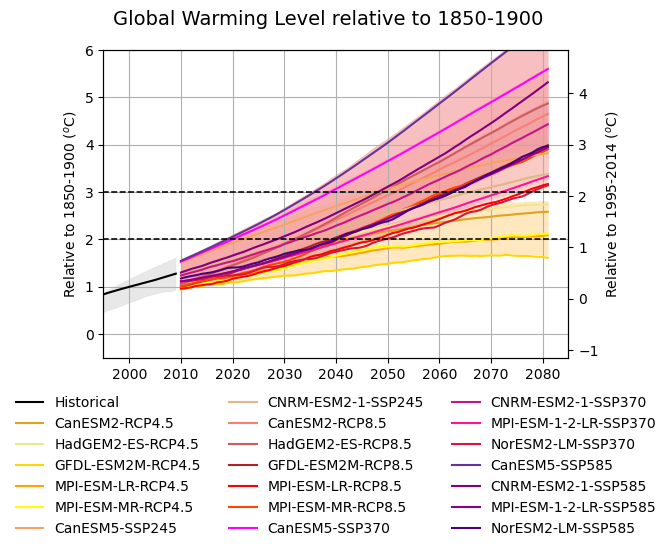

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

t = np.arange(2010,2101,1)
h = np.arange(1850,2010,1)

# historical envelop
plt.fill_between(h, histmin, histmax,  color="lightgrey", linewidth=0.5, alpha=0.5)
ax.plot(h, histmean, color='black')

# RCP45
plt.fill_between(t, rcp45_1, rcp45_99, color="orange", linewidth=0.25, alpha=0.25)

ax.plot(t, can45_m, color='goldenrod')
ax.plot(t, had45_m, color='khaki')
ax.plot(t, mpilr45_m, color='orange')
ax.plot(t, gfdl45, color='gold')
ax.plot(t, mpimr45, color='yellow')

# RCP85
plt.fill_between(t, rcp85_1, rcp85_99, color="firebrick", linewidth=0.25, alpha=0.25)

ax.plot(t, can85_m, color='salmon')
ax.plot(t, had85_m, color='indianred')
ax.plot(t, mpilr85_m, color='firebrick')
ax.plot(t, gfdl85, color='red')
ax.plot(t, mpimr85, color='orangered')

# SSP245
plt.fill_between(t, ssp245_5, ssp245_95, color="moccasin", linewidth=0.5, alpha=0.5)
ax.plot(t, can245_m, color='sandybrown')
ax.plot(t, cnrm245_m, color='burlywood')

# SSP 370
plt.fill_between(t, ssp370_5, ssp370_95, color="pink", linewidth=0.25, alpha=0.5)
ax.plot(t, can370_m, color='fuchsia')
ax.plot(t, cnrm370_m, color='mediumvioletred')
ax.plot(t, mpi370_m, color='deeppink')
ax.plot(t, nor370_m, color='crimson')

# SSP 585
plt.fill_between(t, ssp585_5, ssp585_95, color="lightcoral", linewidth=0.25, alpha=0.5)
ax.plot(t, can585_m, color='rebeccapurple')
ax.plot(t, cnrm585_m, color='purple')
ax.plot(t, mpi585_m, color='darkmagenta')
ax.plot(t, nor585_m, color='indigo')

ax.hlines(2, 1985,2085, linestyle="--", linewidth=1.15, color='black')
ax.hlines(3, 1985,2085, linestyle="--", linewidth=1.15, color='black')

ax.set_xlim(1995, 2085)
ax.set_ylim(-0.5,6)
ax.set_xlabel("")
ax.set_ylabel(r"Relative to 1850-1900 ($^o$C)")
ax.grid(True)

rel1995 = -1.15
ax2 = ax.twinx()
ax2.set_ylim(rel1995, rel1995+6)
ax2.set_ylabel(r"Relative to 1995-2014 ($^o$C)")

fig.suptitle("Global Warming Level relative to 1850-1900", fontsize=14)

custom_lines = [
    Line2D([0], [0], color="black"),
    Line2D([0], [0], color="goldenrod"),
    Line2D([0], [0], color="khaki"),
    Line2D([0], [0], color="gold"),
    Line2D([0], [0], color="orange"),
    Line2D([0], [0], color="yellow"),
    Line2D([0], [0], color="sandybrown"),
    Line2D([0], [0], color="burlywood"),
    Line2D([0], [0], color="salmon"),
    Line2D([0], [0], color="indianred"),
    Line2D([0], [0], color="firebrick"),
    Line2D([0], [0], color="red"),
    Line2D([0], [0], color="orangered"),
    Line2D([0], [0], color="fuchsia"),
    Line2D([0], [0], color="mediumvioletred"),
    Line2D([0], [0], color="deeppink"),
    Line2D([0], [0], color="crimson"),
    Line2D([0], [0], color="rebeccapurple"),
    Line2D([0], [0], color="purple"),
    Line2D([0], [0], color="darkmagenta"),
    Line2D([0], [0], color="indigo"),

]

plt.legend(
    custom_lines,
    ("Historical", "CanESM2-RCP4.5", 'HadGEM2-ES-RCP4.5', 'GFDL-ESM2M-RCP4.5', 'MPI-ESM-LR-RCP4.5', 'MPI-ESM-MR-RCP4.5',
    'CanESM5-SSP245', 'CNRM-ESM2-1-SSP245', 
    "CanESM2-RCP8.5", 'HadGEM2-ES-RCP8.5', 'GFDL-ESM2M-RCP8.5', 'MPI-ESM-LR-RCP8.5', 'MPI-ESM-MR-RCP8.5',
    'CanESM5-SSP370', 'CNRM-ESM2-1-SSP370', 'MPI-ESM-1-2-LR-SSP370', 'NorESM2-LM-SSP370',
    'CanESM5-SSP585', 'CNRM-ESM2-1-SSP585', 'MPI-ESM-1-2-LR-SSP585', 'NorESM2-LM-SSP585',),
    fontsize="medium",
    ncols=3,
    loc="center",
    bbox_to_anchor=(0.5, -0.35),
    frameon=False,
)

plt.savefig(
    "/glade/u/home/maritye/Plots/Icing/NACORDEX5and6_globalwarminglevels_1980-2100.png", dpi=300
)

plt.show()

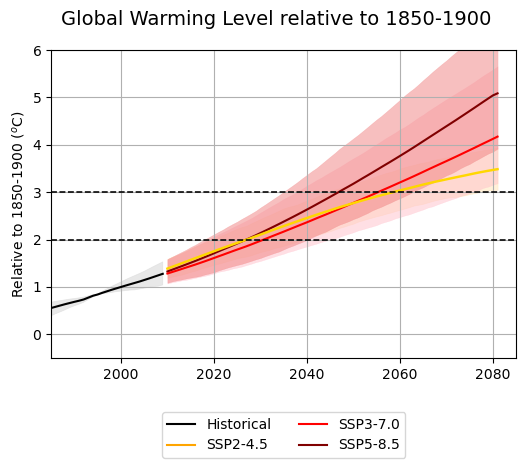

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

t = np.arange(2010,2101,1)
h = np.arange(1850,2010,1)

# historical envelop
plt.fill_between(h, hist5, hist95,  color="lightgrey", linewidth=0.5, alpha=0.5)
ax.plot(h, histmean, color='black')

plt.fill_between(t, ssp245_5, ssp245_95, color="moccasin", linewidth=0.5, alpha=0.5)
plt.fill_between(t, ssp370_5, ssp370_95, color="pink", linewidth=0.25, alpha=0.5)
plt.fill_between(t, ssp585_5, ssp585_95, color="lightcoral", linewidth=0.25, alpha=0.5)

ax.plot(t, ens585.sel(time=slice(2010,2101)), color='maroon')
ax.plot(t, ens370.sel(time=slice(2010,2101)), color='red')
ax.plot(t, ens245.sel(time=slice(2010,2101)), color='gold', linewidth=1.75)

ax.hlines(2, 1985,2085, linestyle="--", linewidth=1.15, color='black')
ax.hlines(3, 1985,2085, linestyle="--", linewidth=1.15, color='black')

ax.set_xlim(1985, 2085)
ax.set_ylim(-0.5,6)
ax.set_xlabel("")
ax.set_ylabel(r"Relative to 1850-1900 ($^o$C)")
#ax.set_title("20 time Running Mean")
ax.grid(True)


fig.suptitle("Global Warming Level relative to 1850-1900", fontsize=14)

custom_lines = [
    Line2D([0], [0], color="black"),
    Line2D([0], [0], color="orange"),
    Line2D([0], [0], color="red"),
    Line2D([0], [0], color="maroon"),
]

plt.legend(
    custom_lines,
    ("Historical", "SSP2-4.5", 'SSP3-7.0', 'SSP5-8.5'),
    fontsize="medium",
    ncols=2,
    loc="center",
    bbox_to_anchor=(0.5, -0.25),
)

plt.savefig(
    "/glade/u/home/maritye/Plots/Icing/CMIP6_globalwarminglevels_1850-2100_v3.png", dpi=300
)
plt.show()

Try plotting with temperature on the x-axis

In [38]:
# Find the earliest and latest years for each GWL in uncertainty ranges

g2_h_l = hist5.where(lambda x: x>2).idxmin().values
g2_s2_l = ssp245_5.where(lambda x: x>2).idxmin().values
g2_s3_l = ssp370_5.where(lambda x: x>2).idxmin().values
g2_s5_l = ssp585_5.where(lambda x: x>2).idxmin().values

g2_h_e = hist95.where(lambda x: x>2).idxmin().values
g2_s2_e = ssp245_95.where(lambda x: x>2).idxmin().values
g2_s3_e = ssp370_95.where(lambda x: x>2).idxmin().values
g2_s5_e = ssp585_95.where(lambda x: x>2).idxmin().values

In [39]:
g3_h_e = hist95.where(lambda x: x>3).idxmin().values
g3_s2_e = ssp245_95.where(lambda x: x>3).idxmin().values
g3_s3_e = ssp370_95.where(lambda x: x>3).idxmin().values
g3_s5_e = ssp585_95.where(lambda x: x>3).idxmin().values

In [40]:
y = np.arange(1850,2101,1)

In [41]:
g2_late = np.nanmax(np.array([g2_h_l, g2_s2_l, g2_s3_l, g2_s5_l]))
g2_early = np.nanmin(np.array([g2_h_e, g2_s2_e, g2_s3_e, g2_s5_e]))

In [42]:
g3_late = 2079 #off the chart so just name it.
g3_early = np.nanmin(np.array([g3_h_e, g3_s2_e, g3_s3_e, g3_s5_e]))

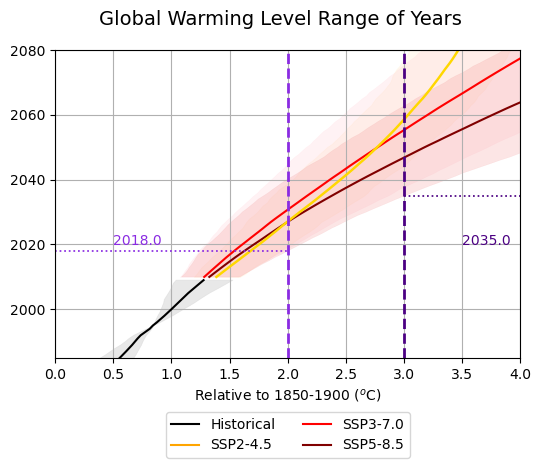

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

t = np.arange(2010,2101,1)
h = np.arange(1850,2010,1)

# historical envelop
plt.fill_betweenx(h, hist5, hist95,  color="lightgrey", linewidth=0.5, alpha=0.5)
ax.plot(histmean, h, color='black')

plt.fill_betweenx(t, ssp245_5, ssp245_95, color="moccasin", linewidth=0.5, alpha=0.2)
plt.fill_betweenx(t, ssp370_5, ssp370_95, color="pink", linewidth=0.25, alpha=0.2)
plt.fill_betweenx(t, ssp585_5, ssp585_95, color="lightcoral", linewidth=0.25, alpha=0.2)

ax.plot(ens585.sel(time=slice(2010,2101)), t, color='maroon')
ax.plot(ens370.sel(time=slice(2010,2101)), t, color='red')
ax.plot(ens245.sel(time=slice(2010,2101)), t, color='gold', linewidth=1.75)

ax.vlines(2, 1985,2080, linestyle="--", linewidth=2, color='blueviolet')
ax.vlines(3, 1985,2080, linestyle="--", linewidth=2, color='indigo')

ax.hlines(g2_early, 0,2, linestyle=':', linewidth=1.25, color='blueviolet')
ax.text(0.5, 2020, g2_early, color='blueviolet')
#ax.hlines(g2_late, 0,2,  linestyle=':', linewidth=1.25, color='blueviolet')
ax.hlines(g3_early, 3,4, linestyle=':', linewidth=1.25, color='indigo')
#ax.hlines(g3_late, 3,4,  linestyle=':', linewidth=1.25, color='indigo')
ax.text(3.5, 2020, g3_early, color='indigo')

ax.set_ylim(1985, 2080)
ax.set_xlim(0,4)
ax.set_ylabel("")
ax.set_xlabel(r"Relative to 1850-1900 ($^o$C)")
ax.grid(True)


fig.suptitle("Global Warming Level Range of Years", fontsize=14)

custom_lines = [
    Line2D([0], [0], color="black"),
    Line2D([0], [0], color="orange"),
    Line2D([0], [0], color="red"),
    Line2D([0], [0], color="maroon"),
]

plt.legend(
    custom_lines,
    ("Historical", "SSP2-4.5", 'SSP3-7.0', 'SSP5-8.5'),
    fontsize="medium",
    ncols=2,
    loc="center",
    bbox_to_anchor=(0.5, -0.25),
)

plt.savefig(
    "/glade/u/home/maritye/Plots/Icing/CMIP6_globalwarminglevels_1980-2100_temponxaxis.png", dpi=300
)
plt.show()

Plot with temperature on x axis and individual lines for model/scenario mean

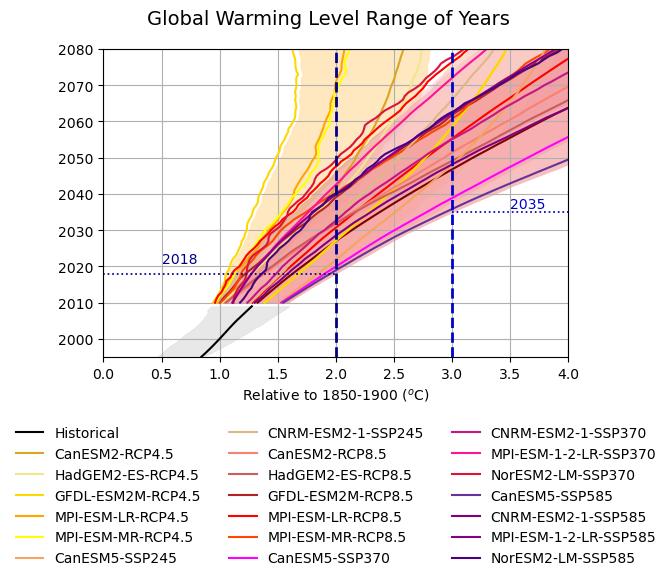

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

t = np.arange(2010,2101,1)
h = np.arange(1850,2010,1)

# historical envelop
plt.fill_betweenx(h, histmin, histmax,  color="lightgrey", linewidth=0.5, alpha=0.5)
ax.plot(histmean, h, color='black')


ax.plot(ens585.sel(time=slice(2010,2101)), t, color='maroon')
ax.plot(ens370.sel(time=slice(2010,2101)), t, color='red')
ax.plot(ens245.sel(time=slice(2010,2101)), t, color='gold', linewidth=1.75)

# RCP45
plt.fill_betweenx(t, rcp45_1, rcp45_99, color="orange", linewidth=0.25, alpha=0.25)

ax.plot(can45_m, t, color='goldenrod')
ax.plot(had45_m, t, color='khaki')
ax.plot(mpilr45_m, t, color='orange')
ax.plot(gfdl45, t, color='gold')
ax.plot(mpimr45, t, color='yellow')

# RCP85
plt.fill_betweenx(t, rcp85_1, rcp85_99, color="firebrick", linewidth=0.25, alpha=0.25)

ax.plot(can85_m, t, color='salmon')
ax.plot(had85_m, t, color='indianred')
ax.plot(mpilr85_m, t, color='firebrick')
ax.plot(gfdl85, t, color='red')
ax.plot(mpimr85, t, color='orangered')

# SSP245
plt.fill_betweenx(t, ssp245_5, ssp245_95, color="moccasin", linewidth=0.5, alpha=0.5)
ax.plot(can245_m, t, color='sandybrown')
ax.plot(cnrm245_m, t, color='burlywood')

# SSP 370
plt.fill_betweenx(t, ssp370_5, ssp370_95, color="pink", linewidth=0.25, alpha=0.5)
ax.plot(can370_m, t, color='fuchsia')
ax.plot(cnrm370_m, t, color='mediumvioletred')
ax.plot(mpi370_m, t, color='deeppink')
ax.plot(nor370_m, t, color='crimson')

# SSP 585
plt.fill_betweenx(t, ssp585_5, ssp585_95, color="lightcoral", linewidth=0.25, alpha=0.5)
ax.plot(can585_m, t, color='rebeccapurple')
ax.plot(cnrm585_m, t, color='purple')
ax.plot(mpi585_m, t, color='darkmagenta')
ax.plot(nor585_m, t, color='indigo')

ax.vlines(2, 1995,2080, linestyle="--", linewidth=2, color='darkblue')
ax.vlines(3, 1995,2080, linestyle="--", linewidth=2, color='mediumblue')

ax.hlines(g2_early, 0,2, linestyle=':', linewidth=1.25, color='darkblue')
ax.text(0.5, 2021, int(g2_early), color='darkblue')
#ax.hlines(g2_late, 0,2,  linestyle=':', linewidth=1.25, color='darkblue')
ax.hlines(g3_early, 3,4, linestyle=':', linewidth=1.25, color='mediumblue')
#ax.hlines(g3_late, 3,4,  linestyle=':', linewidth=1.25, color='mediumblue')
ax.text(3.5, 2036, int(g3_early), color='mediumblue')

ax.set_ylim(1995, 2080)
ax.set_xlim(0,4)
ax.set_ylabel("")
ax.set_xlabel(r"Relative to 1850-1900 ($^o$C)")
ax.grid(True)


fig.suptitle("Global Warming Level Range of Years", fontsize=14)

custom_lines = [
    Line2D([0], [0], color="black"),
    Line2D([0], [0], color="goldenrod"),
    Line2D([0], [0], color="khaki"),
    Line2D([0], [0], color="gold"),
    Line2D([0], [0], color="orange"),
    Line2D([0], [0], color="yellow"),
    Line2D([0], [0], color="sandybrown"),
    Line2D([0], [0], color="burlywood"),
    Line2D([0], [0], color="salmon"),
    Line2D([0], [0], color="indianred"),
    Line2D([0], [0], color="firebrick"),
    Line2D([0], [0], color="red"),
    Line2D([0], [0], color="orangered"),
    Line2D([0], [0], color="fuchsia"),
    Line2D([0], [0], color="mediumvioletred"),
    Line2D([0], [0], color="deeppink"),
    Line2D([0], [0], color="crimson"),
    Line2D([0], [0], color="rebeccapurple"),
    Line2D([0], [0], color="purple"),
    Line2D([0], [0], color="darkmagenta"),
    Line2D([0], [0], color="indigo"),

]

plt.legend(
    custom_lines,
    ("Historical", "CanESM2-RCP4.5", 'HadGEM2-ES-RCP4.5', 'GFDL-ESM2M-RCP4.5', 'MPI-ESM-LR-RCP4.5', 'MPI-ESM-MR-RCP4.5',
    'CanESM5-SSP245', 'CNRM-ESM2-1-SSP245', 
    "CanESM2-RCP8.5", 'HadGEM2-ES-RCP8.5', 'GFDL-ESM2M-RCP8.5', 'MPI-ESM-LR-RCP8.5', 'MPI-ESM-MR-RCP8.5',
    'CanESM5-SSP370', 'CNRM-ESM2-1-SSP370', 'MPI-ESM-1-2-LR-SSP370', 'NorESM2-LM-SSP370',
    'CanESM5-SSP585', 'CNRM-ESM2-1-SSP585', 'MPI-ESM-1-2-LR-SSP585', 'NorESM2-LM-SSP585',),
    fontsize="medium",
    ncols=3,
    loc="center",
    bbox_to_anchor=(0.5, -0.45),
    frameon=False,
)

plt.savefig(
    "/glade/u/home/maritye/Plots/Icing/NACORDEX5and6_globalwarminglevels_1985-2100_temponxaxis.png", dpi=300
)
plt.show()

Bar plot of individual models

In [44]:
canr45_2  = can_anom_45.where(lambda x: x>2).idxmin(dim='year').values
canr45_3 = can_anom_45.where(lambda x: x>3).idxmin(dim='year').values
hadr45_2  = had_anom_45.where(lambda x: x>2).idxmin(dim='year').values
hadr45_3 = had_anom_45.where(lambda x: x>3).idxmin(dim='year').values
gfdlr45_2  = gfdl_anom_45.where(lambda x: x>2).idxmin(dim='year').values
gfdlr45_3 = gfdl_anom_45.where(lambda x: x>3).idxmin(dim='year').values
mpilrr45_2  = mpilr_anom_45.where(lambda x: x>2).idxmin(dim='year').values
mpilrr45_3 = mpilr_anom_45.where(lambda x: x>3).idxmin(dim='year').values
mpimrr45_2 = mpimr_anom_45.where(lambda x: x>2).idxmin(dim='year').values
mpimrr45_3 = mpimr_anom_45.where(lambda x: x>3).idxmin(dim='year').values

In [59]:
cans245_2  = np.rint(can_anoms245.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
cans245_3 = np.rint(can_anoms245.where(lambda x: x>3).idxmin(dim='time').values).astype(int)
cnrm245_2  = np.rint(cnrm_anoms245.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
cnrms245_3 = np.rint(np.nan_to_num(cnrm_anoms245.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)

In [60]:
cans370_2  = np.rint(can_anoms370.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
cans370_3 = np.rint(np.nan_to_num(can_anoms370.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)
cnrm370_2  = np.rint(cnrm_anoms370.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
cnrms370_3 = np.rint(np.nan_to_num(cnrm_anoms370.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)
mpis370_2  = np.rint(mpi_anoms370.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
mpis370_3 = np.rint(np.nan_to_num(mpi_anoms370.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)
nors370_2 = np.rint(np.nan_to_num(nor_anoms370.where(lambda x: x>2).idxmin(dim='time').values, nan=250)).astype(int)
nors370_3 = np.rint(np.nan_to_num(nor_anoms370.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)

In [61]:
cans585_2  = np.rint(can_anoms585.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
cans585_3 = np.rint(np.nan_to_num(can_anoms585.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)
cnrm585_2  = np.rint(cnrm_anoms585.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
cnrms585_3 = np.rint(np.nan_to_num(cnrm_anoms585.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)
mpis585_2  = np.rint(mpi_anoms585.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
mpis585_3 = np.rint(np.nan_to_num(mpi_anoms585.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)
nors585_2 = np.rint(nor_anoms585.where(lambda x: x>2).idxmin(dim='time').values).astype(int)
nors585_3 = np.rint(np.nan_to_num(nor_anoms585.where(lambda x: x>3).idxmin(dim='time').values, nan=250)).astype(int)

In [62]:
canr85_2  = can_anom_85.where(lambda x: x>2).idxmin(dim='year').values
canr85_3 = can_anom_85.where(lambda x: x>3).idxmin(dim='year').values
hadr85_2  = had_anom_85.where(lambda x: x>2).idxmin(dim='year').values
hadr85_3 = had_anom_85.where(lambda x: x>3).idxmin(dim='year').values
gfdlr85_2  = gfdl_anom_85.where(lambda x: x>2).idxmin(dim='year').values
gfdlr85_3 = gfdl_anom_85.where(lambda x: x>3).idxmin(dim='year').values
mpilrr85_2  = mpilr_anom_85.where(lambda x: x>2).idxmin(dim='year').values
mpilrr85_3 = mpilr_anom_85.where(lambda x: x>3).idxmin(dim='year').values
mpimrr85_2 = mpimr_anom_85.where(lambda x: x>2).idxmin(dim='year').values
mpimrr85_3 = mpimr_anom_85.where(lambda x: x>3).idxmin(dim='year').values

In [57]:
gwl2_c5 = np.concatenate([canr45_2, hadr45_2, mpilrr45_2, np.array(mpimrr45_2, ndmin=1), canr85_2, hadr85_2,np.array(gfdlr85_2, ndmin=1), mpilrr85_2, np.array(mpimrr85_2, ndmin=1)])  # to put a box of the full range. Ignore GFDL RCP45 as it doesn't get to 2
gwl3_c5 = np.concatenate([canr85_3, hadr85_3,np.array(gfdlr85_3, ndmin=1), mpilrr85_3, np.array(mpimrr85_3, ndmin=1)])

In [73]:
gwl2_c6 = np.concatenate([cans245_2, cans370_2, cans585_2, cnrm245_2, cnrm370_2, cnrm585_2, mpis370_2, mpis585_2, np.array(nors370_2, ndmin=1),np.array(nors585_2, ndmin=1)])
gwl3_c6 = np.concatenate([cans245_3, cans370_3, cans585_3, cnrms245_3, cnrms370_3, cnrms585_3, cnrms585_3, mpis370_3, mpis585_3, np.array(nors370_3, ndmin=1), np.array(nors585_3, ndmin=1)])

In [74]:
# Combine the arrays into a list
all_2deg = [canr45_2, canr85_2, hadr45_2, hadr85_2, gfdlr85_2, mpilrr45_2,  mpilrr85_2,  mpimrr45_2, mpimrr85_2, gwl2_c5,
           cans245_2, cans370_2, cans585_2, cnrm245_2, cnrm370_2, cnrm585_2, mpis370_2, mpis585_2, nors370_2,nors585_2, gwl2_c6]

# Create labels for the violins
labels = ['CanESM2-RCP4.5', 'CanESM2-RCP8.5','HadGEM2-ES-RCP4.5','HadGEM2-ES-RCP8.5', 'GFDL-ESM2M-RCP8.5','MPI-ESM-LR-RCP4.5','MPI-ESM-LR-RCP8.5', 'MPI-ESM-MR-RCP4.5','MPI-ESM-MR-RCP8.5','CMIP5 Ensemble',
     'CanESM5-SSP245', 'CanESM5-SSP370','CanESM5-SSP585',  'CNRM-ESM2-1-SSP245', 'CNRM-ESM2-1-SSP370','CNRM-ESM2-1-SSP585', 'MPI-ESM-1-2-LR-SSP370','MPI-ESM-1-2-LR-SSP585', 'NorESM2-LM-SSP370',
    'NorESM2-LM-SSP585', 'CMIP6 Ensemble']

# Define colors for each violin
colors = ["goldenrod","salmon","khaki","indianred","firebrick","orange","red","yellow","orangered","coral","sandybrown","fuchsia","rebeccapurple","burlywood","mediumvioletred","purple","deeppink","darkmagenta","crimson","indigo","navy"]

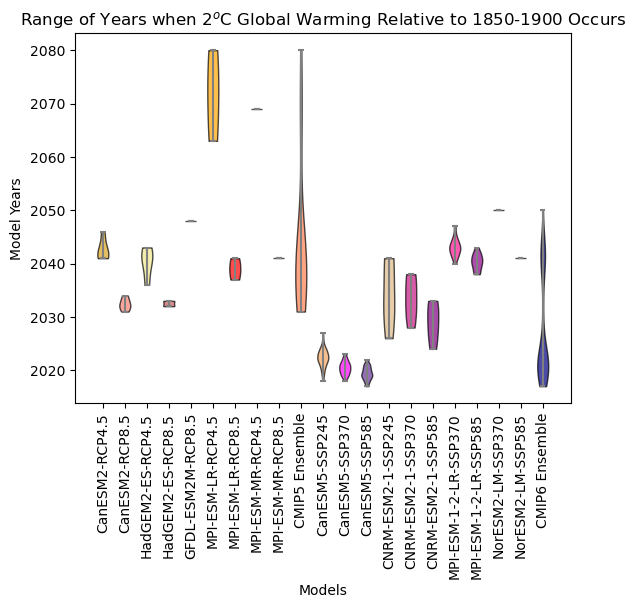

In [75]:
# Create the figure and axes
fig, ax = plt.subplots()

# Plot the violin plot
violin_parts = ax.violinplot(all_2deg)

# Customize the colors of the violin bodies
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black') # Optional: set edge color
    pc.set_alpha(0.7) # Optional: set transparency

# Customize other elements (optional)
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = violin_parts[partname]
    vp.set_edgecolor('gray')


# Set x-axis tick labels
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, rotation=90, )

# Add title and axis labels
ax.set_title(r"Range of Years when $2^o$C Global Warming Relative to 1850-1900 Occurs")
ax.set_xlabel('Models')
ax.set_ylabel('Model Years')

plt.savefig(
    "/glade/u/home/maritye/Plots/Icing/NACORDEX5and6_GWL2_1850-2100_violinplots.png", dpi=300
)
# Display the plot
plt.show()

In [76]:
all_3deg = [np.nan_to_num(canr45_3, nan=2200), canr85_3, np.nan_to_num(hadr45_3, nan=2200), hadr85_3, gfdlr85_3, np.nan_to_num(mpilrr45_3, nan=2200),  mpilrr85_3,  np.nan_to_num(mpimrr45_3, nan=2200), mpimrr85_3, gwl3_c5,
           cans245_3, cans370_3, cans585_3, cnrms245_3, cnrms370_3, cnrms585_3, mpis370_3, mpis585_3, nors370_3,nors585_3, gwl3_c6]


In [77]:
gwl3_c6.min()

2034

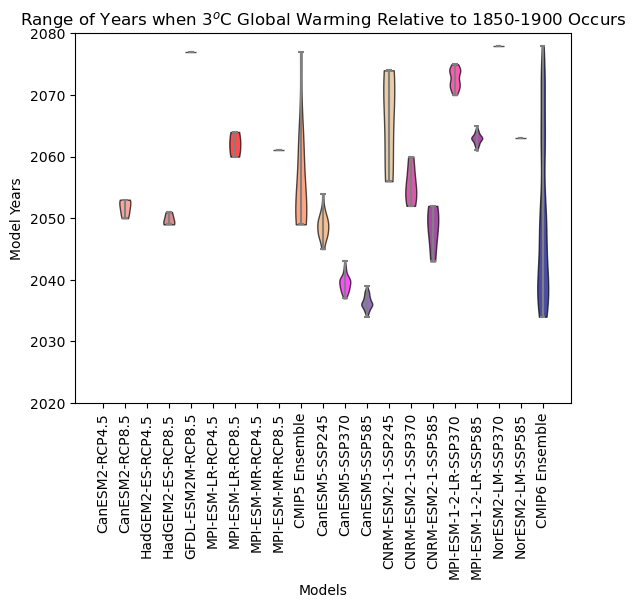

In [78]:
# Create the figure and axes
fig, ax = plt.subplots()

# Plot the violin plot
violin_parts = ax.violinplot(all_3deg)

# Customize the colors of the violin bodies
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black') # Optional: set edge color
    pc.set_alpha(0.7) # Optional: set transparency

# Customize other elements (optional)
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = violin_parts[partname]
    vp.set_edgecolor('gray')


# Set x-axis tick labels
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, rotation=90, )

# Add title and axis labels
ax.set_title(r"Range of Years when $3^o$C Global Warming Relative to 1850-1900 Occurs")
ax.set_xlabel('Models')
ax.set_ylabel('Model Years')
plt.ylim(2020,2080)

plt.savefig(
    "/glade/u/home/maritye/Plots/Icing/NACORDEX5and6_GWL3_1850-2100_violinplots.png", dpi=300
)

# Display the plot
plt.show()